In [2]:
# Step 1: Upload the dataset (Manual Step)
from google.colab import files

uploaded = files.upload()  # Upload "sentence-aligned.v2.tar.gz" from your local machine

# Step 2: Extract the dataset
import tarfile
import os

# Define paths
file_path = "sentence-aligned.v2.tar.gz"  # Use the uploaded file
extract_path = "/content/sentence_aligned_v2"

# Extract the tar.gz file
with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

# Step 3: Check extracted files
extracted_files = os.listdir(extract_path)
print("Extracted Files:", extracted_files)

# Step 4: Read the data files
normal_file = os.path.join(extract_path, "sentence-aligned.v2", "normal.aligned")
simple_file = os.path.join(extract_path, "sentence-aligned.v2", "simple.aligned")

# Step 5: Clean the dataset (Extract actual sentences)
def clean_sentences(file_path):
    cleaned_sentences = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) > 2:  # Ensure it has the expected format
                cleaned_sentences.append(parts[-1])  # Take the actual sentence
    return cleaned_sentences

# Clean both files
cleaned_normal_sentences = clean_sentences(normal_file)
cleaned_simple_sentences = clean_sentences(simple_file)

# Step 6: Create a DataFrame
import pandas as pd

df_cleaned = pd.DataFrame({"Standard English": cleaned_normal_sentences, "Simple English": cleaned_simple_sentences})

# Step 7: Save the cleaned dataset to Colab's /content directory
cleaned_file_path = "/content/cleaned_sentence_aligned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"✅ Cleaned dataset saved at: {cleaned_file_path}")

# Step 8: Allow Download (Optional - If you want to save to local machine)
files.download(cleaned_file_path)  # This will download the file to your computer

Saving sentence-aligned.v2.tar.gz to sentence-aligned.v2.tar.gz
Extracted Files: ['sentence-aligned.v2']
✅ Cleaned dataset saved at: /content/cleaned_sentence_aligned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd

# Load the cleaned dataset from /content/
cleaned_file_path = "/content/cleaned_sentence_aligned.csv"

# Read the CSV file
df = pd.read_csv(cleaned_file_path)

# Display the first 10 rows
df.head(10)


,Standard English,Simple English
0,It is the county seat of Alfalfa County .,It is the county seat of Alfalfa County .
1,"Cherokee is a city in Alfalfa County , Oklahom...",Cherokee is a city of Oklahoma in the United S...
2,Skateboard decks are usually between 28 and 33...,Skateboard decks are normally between 28 and 3...
3,The underside of the deck can be printed with ...,The bottom of the deck can be printed with a d...
4,This was created by two surfers ; Ben Whatson ...,The longboard was made by two surfers ; Ben Wh...
5,Some of them have special materials that help ...,Other materials used in making decks fiberglas...
6,`` Old school '' boards -LRB- those made in th...,`` Old school '' boards -LRB- those made in th...
7,One of the first deck companies was called `` ...,One of the first deck companies was called `` ...
8,"Grip tape , when applied to the top surface of...","Grip tape , when put on to the top of a skateb..."
9,"Modern decks vary in size , but most are 7 to ...",Modern decks are different in size . Most are ...


In [4]:
!pip uninstall -y torch torchtext

Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124


In [5]:
!pip install torch==2.0.1 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [6]:
import torch
import torchtext

print(f"PyTorch version: {torch.__version__}")
print(f"TorchText version: {torchtext.__version__}")

PyTorch version: 2.0.1+cu117
TorchText version: 0.15.2+cpu


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Set seed for reproducibility
SEED = 1234
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

cuda


In [9]:
# Load dataset
df = pd.read_csv("/content/cleaned_sentence_aligned.csv")

# Define source and target languages
SRC_LANGUAGE = 'en'
TRG_LANGUAGE = 'comic'

In [10]:
# Tokenization
token_transform = {}
token_transform[SRC_LANGUAGE] = get_tokenizer("spacy", language="en_core_web_sm")
token_transform[TRG_LANGUAGE] = get_tokenizer("basic_english")

# Tokenize dataset
df["Standard English Tokens"] = df["Standard English"].apply(token_transform[SRC_LANGUAGE])
df["Comic English Tokens"] = df["Simple English"].apply(token_transform[TRG_LANGUAGE])


In [11]:
# Display the first 10 rows with tokens
print(df.head(10))

                                    Standard English  \
0          It is the county seat of Alfalfa County .   
1  Cherokee is a city in Alfalfa County , Oklahom...   
2  Skateboard decks are usually between 28 and 33...   
3  The underside of the deck can be printed with ...   
4  This was created by two surfers ; Ben Whatson ...   
5  Some of them have special materials that help ...   
6  `` Old school '' boards -LRB- those made in th...   
7  One of the first deck companies was called `` ...   
8  Grip tape , when applied to the top surface of...   
9  Modern decks vary in size , but most are 7 to ...   

                                      Simple English  \
0          It is the county seat of Alfalfa County .   
1  Cherokee is a city of Oklahoma in the United S...   
2  Skateboard decks are normally between 28 and 3...   
3  The bottom of the deck can be printed with a d...   
4  The longboard was made by two surfers ; Ben Wh...   
5  Other materials used in making decks fibergl

In [12]:
# Build Vocabulary
def yield_tokens(data_column):
    for sentence in data_column:
        yield sentence

vocab_transform = {}
vocab_transform[SRC_LANGUAGE] = build_vocab_from_iterator(yield_tokens(df["Standard English Tokens"]), min_freq=2, specials=["<unk>", "<pad>", "<sos>", "<eos>"])
vocab_transform[TRG_LANGUAGE] = build_vocab_from_iterator(yield_tokens(df["Comic English Tokens"]), min_freq=2, specials=["<unk>", "<pad>", "<sos>", "<eos>"])

for ln in [SRC_LANGUAGE, TRG_LANGUAGE]:
    vocab_transform[ln].set_default_index(vocab_transform[ln]["<unk>"])


In [13]:
# Define constants
PAD_IDX = vocab_transform[SRC_LANGUAGE]["<pad>"]
SOS_IDX = vocab_transform[SRC_LANGUAGE]["<sos>"]
EOS_IDX = vocab_transform[SRC_LANGUAGE]["<eos>"]

# Convert text into tensor
def tensor_transform(token_ids):
    return torch.cat((torch.tensor([SOS_IDX]), torch.tensor(token_ids), torch.tensor([EOS_IDX])))

# Sequential Transforms
text_transform = {}
for ln in [SRC_LANGUAGE, TRG_LANGUAGE]:
    text_transform[ln] = lambda x: tensor_transform(vocab_transform[ln](token_transform[ln](x)))


In [14]:
# Data Collation
def collate_batch(batch):
    src_batch, trg_batch = [], []
    for src_sample, trg_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        trg_batch.append(text_transform[TRG_LANGUAGE](trg_sample.rstrip("\n")))
    src_batch = torch.nn.utils.rnn.pad_sequence(src_batch, padding_value=PAD_IDX, batch_first=True)
    trg_batch = torch.nn.utils.rnn.pad_sequence(trg_batch, padding_value=PAD_IDX, batch_first=True)
    return src_batch, trg_batch

# Create Dataloaders
batch_size = 16
dataset = list(zip(df["Standard English"], df["Simple English"]))
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_data, val_data, test_data = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)


In [15]:
# Define Attention Mechanism
class Attention(nn.Module):
    def __init__(self, method, hidden_size):
        super(Attention, self).__init__()
        self.method = method
        self.hidden_size = hidden_size

        if method == "general":
            self.attn = nn.Linear(hidden_size, hidden_size)
        elif method == "multiplicative":
            self.attn = nn.Linear(hidden_size, hidden_size, bias=False)
        elif method == "additive":
            self.attn = nn.Linear(hidden_size * 2, hidden_size)
            self.v = nn.Parameter(torch.rand(hidden_size))

    def forward(self, hidden, encoder_outputs):
        batch_size, seq_len, _ = encoder_outputs.shape
        hidden = hidden.unsqueeze(1).repeat(1, seq_len, 1)

        if self.method == "general":
            energy = self.attn(encoder_outputs)
            attention_weights = torch.bmm(hidden, energy.permute(0, 2, 1)).squeeze(1)
        elif self.method == "multiplicative":
            energy = torch.matmul(hidden, self.attn(encoder_outputs).permute(0, 2, 1))
            attention_weights = energy.squeeze(1)
        elif self.method == "additive":
            energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
            attention_weights = torch.sum(self.v * energy, dim=2)
        return torch.softmax(attention_weights, dim=1)

In [16]:
# Define Transformer-based Seq2Seq Model with Attention
class Seq2SeqTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim=128, n_layers=2, n_heads=4, pf_dim=256, dropout=0.1, attn_type="general"):
        super().__init__()
        self.encoder = nn.Embedding(input_dim, hid_dim)
        self.decoder = nn.Embedding(output_dim, hid_dim)
        self.transformer = nn.Transformer(d_model=hid_dim, nhead=n_heads, num_encoder_layers=n_layers, num_decoder_layers=n_layers, dim_feedforward=pf_dim, dropout=dropout, batch_first=True)
        self.attention = Attention(attn_type, hid_dim)
        self.fc_out = nn.Linear(hid_dim, output_dim)

    def forward(self, src, trg):
        enc_src = self.encoder(src)
        dec_trg = self.decoder(trg)
        transformer_output = self.transformer(enc_src, dec_trg)
        attn_weights = self.attention(enc_src[:, -1, :], enc_src)
        return self.fc_out(transformer_output), attn_weights



In [17]:
# Clear memory before training
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [18]:
# Initialize Model
input_dim = len(vocab_transform[SRC_LANGUAGE])
output_dim = len(vocab_transform[TRG_LANGUAGE])
hid_dim = 128
n_layers = 2
n_heads = 4
pf_dim = 256
dropout = 0.1
attn_type = "additive"

model = Seq2SeqTransformer(input_dim, output_dim, hid_dim, n_layers, n_heads, pf_dim, dropout, attn_type).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

In [20]:
# Train and Evaluate Model with Different Attention Mechanisms
attention_types = ["general", "multiplicative", "additive"]
results = {}

In [21]:
# Initialize results dictionary
results = {attn_type: {"train_loss": [], "val_loss": [], "train_ppl": [], "val_ppl": []} for attn_type in ["general", "multiplicative", "additive"]}


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def display_attention(sentence_tokens, translation_tokens, attention_weights, attn_type):
    """
    Display and save attention weights between input (source) and output (target) tokens.
    """
    # Convert tensor to numpy
    attention = attention_weights.squeeze(0).cpu().detach().numpy()

    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(attention, cmap='Blues', aspect='auto')

    # Set axis labels
    ax.set_xticklabels([''] + sentence_tokens, rotation=45, ha='left', fontsize=10)
    ax.set_yticklabels([''] + translation_tokens, fontsize=10)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    # Color bar
    fig.colorbar(cax)
    plt.title(f"Attention Map - {attn_type} Attention", fontsize=12)

    # Save attention map
    save_path = f"attention_map_{attn_type}.png"
    plt.savefig(save_path, bbox_inches='tight')
    print(f"✅ Saved attention map as {save_path}")

    plt.show()


In [ ]:
# Train and Evaluate Model with Time Tracking and Generate Attention Maps
for attn_type in results.keys():
    print(f"Training with {attn_type} attention...")

    model = Seq2SeqTransformer(len(vocab_transform[SRC_LANGUAGE]), len(vocab_transform[TRG_LANGUAGE]), attn_type=attn_type).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    start_time = time.time()
    for epoch in range(10):
        model.train()
        epoch_loss = 0
        for src, trg in train_loader:
            src, trg = src.to(device), trg.to(device)
            optimizer.zero_grad()
            output, attn_weights = model(src, trg[:, :-1])
            loss = criterion(output.view(-1, output.shape[-1]), trg[:, 1:].reshape(-1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        train_loss = epoch_loss / len(train_loader)
        train_ppl = math.exp(train_loss)
        results[attn_type]["train_loss"].append(train_loss)
        results[attn_type]["train_ppl"].append(train_ppl)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for src, trg in valid_loader:
                src, trg = src.to(device), trg.to(device)
                output, attn_weights = model(src, trg[:, :-1])
                loss = criterion(output.view(-1, output.shape[-1]), trg[:, 1:].reshape(-1))
                val_loss += loss.item()

        val_loss = val_loss / len(valid_loader)
        val_ppl = math.exp(val_loss)
        results[attn_type]["val_loss"].append(val_loss)
        results[attn_type]["val_ppl"].append(val_ppl)

        print(f'Epoch {epoch+1}: Train Loss = {train_loss:.3f}, Train PPL = {train_ppl:.3f}, Val Loss = {val_loss:.3f}, Val PPL = {val_ppl:.3f}')

    end_time = time.time()
    results[attn_type]["training_time"] = end_time - start_time
    print(f"Training Time for {attn_type}: {results[attn_type]['training_time']:.2f} seconds")

    # Generate and Save Attention Maps AFTER training for this attention type
    print(f"Generating Attention Map for {attn_type} Attention...")

    # Select a random batch from training data
    src_text, trg_text = next(iter(train_loader))
    src_text, trg_text = src_text.to(device), trg_text.to(device)

    # Run the trained model to get attention weights
    with torch.no_grad():
        output, attn_weights = model(src_text, trg_text[:, :-1])

    # Decode tokens into words for visualization
    source_tokens = [vocab_transform[SRC_LANGUAGE].lookup_token(idx) for idx in src_text[0].tolist()]
    target_tokens = [vocab_transform[TRG_LANGUAGE].lookup_token(idx) for idx in trg_text[0].tolist()]

    # Display and save attention map
    display_attention(source_tokens, target_tokens, attn_weights[0], attn_type)


Training with general attention...


In [ ]:
# Train and Evaluate Model with Time Tracking
for attn_type in results.keys():
    print(f"Training with {attn_type} attention...")
    model = Seq2SeqTransformer(len(vocab_transform[SRC_LANGUAGE]), len(vocab_transform[TRG_LANGUAGE]), attn_type=attn_type).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    start_time = time.time()
    for epoch in range(10):
        model.train()
        epoch_loss = 0
        for src, trg in train_loader:
            src, trg = src.to(device), trg.to(device)
            optimizer.zero_grad()
            output, _ = model(src, trg[:, :-1])
            loss = criterion(output.view(-1, output.shape[-1]), trg[:, 1:].reshape(-1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_loss = epoch_loss / len(train_loader)
        train_ppl = math.exp(train_loss)
        results[attn_type]["train_loss"].append(train_loss)
        results[attn_type]["train_ppl"].append(train_ppl)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for src, trg in valid_loader:
                src, trg = src.to(device), trg.to(device)
                output, _ = model(src, trg[:, :-1])
                loss = criterion(output.view(-1, output.shape[-1]), trg[:, 1:].reshape(-1))
                val_loss += loss.item()
        val_loss = val_loss / len(valid_loader)
        val_ppl = math.exp(val_loss)
        results[attn_type]["val_loss"].append(val_loss)
        results[attn_type]["val_ppl"].append(val_ppl)

        print(f'Epoch {epoch+1}: Train Loss = {train_loss:.3f}, Train PPL = {train_ppl:.3f}, Val Loss = {val_loss:.3f}, Val PPL = {val_ppl:.3f}')

    end_time = time.time()
    results[attn_type]["training_time"] = end_time - start_time
    print(f"Training Time for {attn_type}: {results[attn_type]['training_time']:.2f} seconds")


Training with general attention...
Epoch 1: Train Loss = 5.196, Train PPL = 180.542, Val Loss = 4.464, Val PPL = 86.815
Epoch 2: Train Loss = 4.154, Train PPL = 63.692, Val Loss = 3.970, Val PPL = 52.963
Epoch 3: Train Loss = 3.656, Train PPL = 38.698, Val Loss = 3.708, Val PPL = 40.777
Epoch 4: Train Loss = 3.329, Train PPL = 27.912, Val Loss = 3.549, Val PPL = 34.778
Epoch 5: Train Loss = 3.096, Train PPL = 22.100, Val Loss = 3.452, Val PPL = 31.563
Epoch 6: Train Loss = 2.925, Train PPL = 18.626, Val Loss = 3.383, Val PPL = 29.464
Epoch 7: Train Loss = 2.794, Train PPL = 16.352, Val Loss = 3.341, Val PPL = 28.246
Epoch 8: Train Loss = 2.693, Train PPL = 14.781, Val Loss = 3.308, Val PPL = 27.323
Epoch 9: Train Loss = 2.610, Train PPL = 13.598, Val Loss = 3.277, Val PPL = 26.498
Epoch 10: Train Loss = 2.541, Train PPL = 12.696, Val Loss = 3.259, Val PPL = 26.015
Training Time for general: 3050.46 seconds
Training with multiplicative attention...
Epoch 1: Train Loss = 5.193, Train PPL

In [1]:
import matplotlib.pyplot as plt

# Print loss values to debug overlapping issue
for attn_type in results.keys():
    print(f"\n{attn_type} Attention:")
    print(f"Train Loss: {results[attn_type]['train_loss']}")
    print(f"Validation Loss: {results[attn_type]['val_loss']}")

# Generate Performance Plots with markers and different styles
plt.figure(figsize=(10, 5))

colors = {"general": "blue", "multiplicative": "green", "additive": "purple"}
markers = {"general": "o", "multiplicative": "s", "additive": "d"}  # Different markers

for attn_type in results.keys():
    plt.plot(results[attn_type]["train_loss"],
             label=f"{attn_type} Train Loss",
             linestyle="-",
             linewidth=2,
             color=colors[attn_type],
             marker=markers[attn_type],
             markersize=5)

    plt.plot(results[attn_type]["val_loss"],
             label=f"{attn_type} Val Loss",
             linestyle="--",
             linewidth=2,
             color=colors[attn_type],
             marker=markers[attn_type],
             markersize=5)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Comparison")
plt.grid(True)  # Added grid for better readability
plt.savefig("training_loss_comparison.png")
plt.show()



NameError: name 'results' is not defined

In [ ]:
# Select the best attention mechanism
best_attn_type = min(results.keys(), key=lambda attn: results[attn]["val_loss"][-1])
print(f"Best Attention Mechanism: {best_attn_type}")

Best Attention Mechanism: general


In [ ]:
# Train the best model
best_model = Seq2SeqTransformer(len(vocab_transform[SRC_LANGUAGE]), len(vocab_transform[TRG_LANGUAGE]), attn_type=best_attn_type).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = optim.Adam(best_model.parameters(), lr=0.0005)

for epoch in range(10):
    best_model.train()
    epoch_loss = 0
    for src, trg in train_loader:
        src, trg = src.to(device), trg.to(device)
        optimizer.zero_grad()
        output, _ = best_model(src, trg[:, :-1])
        loss = criterion(output.view(-1, output.shape[-1]), trg[:, 1:].reshape(-1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}: Best Model Train Loss = {epoch_loss / len(train_loader):.3f}")


Epoch 1: Best Model Train Loss = 5.207
Epoch 2: Best Model Train Loss = 4.165
Epoch 3: Best Model Train Loss = 3.665
Epoch 4: Best Model Train Loss = 3.336
Epoch 5: Best Model Train Loss = 3.103
Epoch 6: Best Model Train Loss = 2.933
Epoch 7: Best Model Train Loss = 2.801
Epoch 8: Best Model Train Loss = 2.699
Epoch 9: Best Model Train Loss = 2.618
Epoch 10: Best Model Train Loss = 2.551


In [ ]:
# Evaluation Function
def evaluate(model, loader, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for src, trg in loader:
            src, trg = src.to(device), trg.to(device)
            output, _ = model(src, trg[:, :-1])
            loss = criterion(output.view(-1, output.shape[-1]), trg[:, 1:].reshape(-1))
            epoch_loss += loss.item()
    return epoch_loss / len(loader)

In [ ]:
# Evaluate Model
test_loss = evaluate(best_model, test_loader, criterion)
print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

| Test Loss: 3.258 | Test PPL:  25.985 |


In [ ]:
# Save best model after training
torch.save(best_model.state_dict(), "best_comic_translator.pth")
print("✅ Best model saved as best_comic_translator.pth")

✅ Best model saved as best_comic_translator.pth


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import torch
import torch.nn as nn
from transformers import AutoTokenizer
from PIL import Image

# Define the modified code as a string
modified_code = """
import streamlit as st
import torch
import torch.nn as nn
from transformers import AutoTokenizer
from PIL import Image


def load_model(model_path):
    model = torch.load(model_path, map_location=torch.device('cpu'))
    model.eval()
    return model

# Save the Streamlit app in Colab's /content directory
app_save_path = "/content/app.py"

# Load the trained model
model_path = "best_comic_translator.pth"
model = load_model(model_path)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def translate_text(input_text):
    tokens = tokenizer.encode(input_text, return_tensors="pt")
    with torch.no_grad():
        output = model(tokens)
    translated_text = tokenizer.decode(output.argmax(dim=-1)[0], skip_special_tokens=True)
    return translated_text

# Streamlit UI
def main():
    st.set_page_config(page_title="Text Simplifier", layout="centered")

    # Background image
    background_image = "A_creative_blue-themed_background_with_a_smooth_gr.png"
    st.image(background_image, use_column_width=True)

    st.title("Simplified English Translator")
    st.write("Enter an English sentence and get its simplified version!")

    user_input = st.text_area("Enter your text:", "")
    if st.button("Translate"):
        if user_input.strip():
            translated_text = translate_text(user_input)
            st.success(f"**Simplified English Translation:** {translated_text}")
        else:
            st.warning("Please enter a sentence to translate.")

    st.write("---")
    st.subheader("How It Works")
    st.write("This web app uses a Transformer-based model with attention mechanisms to simplify complex English sentences into easier-to-understand versions.")

if __name__ == "__main__":
    main()
"""

# Write the modified code to app.py
with open('/content/app.py', 'w') as f:
    f.write(modified_code)

print("Streamlit app has been saved as app.py in /content directory.")


Streamlit app has been saved as app.py in /content directory.


In [ ]:
# Training Loop
train_losses, val_losses = [], []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for src, trg in train_loader:
        src, trg = src.to(device), trg.to(device)
        optimizer.zero_grad()
        output, attn_weights = model(src, trg[:, :-1])
        loss = criterion(output.view(-1, output.shape[-1]), trg[:, 1:].reshape(-1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))
    print(f'Epoch {epoch+1}: Train Loss = {epoch_loss / len(train_loader):.3f}')

Epoch 1: Train Loss = 5.200
Epoch 2: Train Loss = 4.166
Epoch 3: Train Loss = 3.665
Epoch 4: Train Loss = 3.335
Epoch 5: Train Loss = 3.104
Epoch 6: Train Loss = 2.934
Epoch 7: Train Loss = 2.804
Epoch 8: Train Loss = 2.702
Epoch 9: Train Loss = 2.620
Epoch 10: Train Loss = 2.553


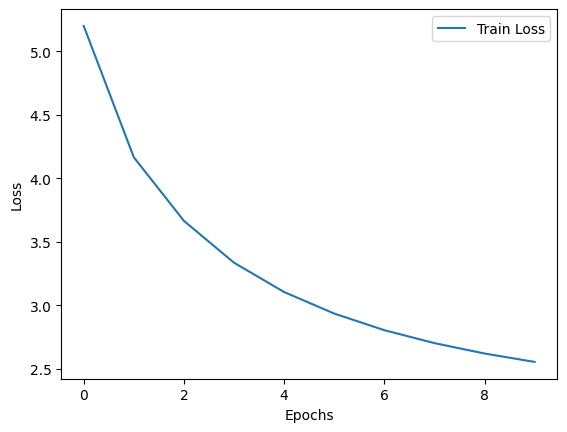

In [ ]:
# Plot Training Loss
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()